# Quelques exercices sur les chaînes de caractères

**Recherche d'un motif *m* dans un texte *t*** (touche F3 ou Crtl+F)

Exercice **1**

Ecrire une fonction Python ``isMemberOf(t,m)`` qui, à partir de deux chaînes de caractères ``t`` et ``m`` fournies en argument, renvoie le booléen True si ``m`` (le *motif*) est une sous chaîne de ``t`` ( le *texte*) et False sinon.

Exemple : pour t='ABCAACABBAAABAAB' et m='AAB', la fonction renvoie True.

**Note :** l'instruction Python `` m in t `` effectue cette opération, mais on demande une programmation itérative en parcourant les caractères de la chaîne.

On met en oeuvre un algorithme naïf qui consiste à chercher d'abord la permière lettre de la chaîne ``m`` dans ``t`` puis de vérifier ensuite si toutes les lettres suivantes sont présentes.

Tester votre fonction

In [8]:
def isMemberOf(t,m): # renvoie True si sub est une sous-chaîne de s
    n=len(t)      # nombre de caractères de la chaine principale
    p=len(m) # nombre de caractères de la sous-chaîne à chercher
    for k in range(n-p+1): # l'indice de la première lettre ne peut pas être supérieur à n-nsub+1
        if t[k]==m[0]: # la première lettre est trouvée
            j=1 # on cherche les correspondances sur les lettres suivantes
            while (j<p) and (m[j]==t[j+k]) :  # on parcourt toutes les lettres de sub
                j+=1                          # tant que les lettres coïncident 
            if (j==p) : # toutes les lettres coïncident
                return True
    return False # si on parvient jusqu'ici, c'est qu'aucun motif n'a été trouvé

In [14]:
s1 = 'BONJOUR'
s2 = 'AAB'
isMemberOf(s1,s2)

['BON', 'ONJ', 'NJO', 'JOU', 'OUR', 'UR', 'R']


False

**Complexité**
On appelle $n$ le nombre de caractères dans le texte et $p$ le nombre de caractères dans le motif.
Quelle est la complexité de l'algorithme dans le pire des cas? 
 On pourra supposer que $p\ll n$.



Dans le pire des cas, la boucle ``for`` s'exécute $n-p+1$ fois, la boucle ``while`` s'exécute $p-1$ fois.

Ainsi, si on considère que la longueur $p$ du motif est négligeable devant la longueur $n$ du texte dans lequel on cherche ($p\ll n$), la complexité de cet algorithme naïf est de l'ordre de $n\times p$.

Autre possibilité ci-dessous, en utilisant les **listes en compréhension**.

In [12]:
def isMemberOf(t,m): # renvoie True si sub est une sous-chaîne de s
    p=len(m)
    n=len(t)
    ListeChaine = [t[k:k+p] for k in range(n)]
    print(ListeChaine)
    for el in [t[k:k+p] for k in range(n)]: # liste en compréhension : el est une sous-chaine de m de longueur p
        if el==m: # el est une sous-chaine de m de longueur p, a-t-on correspondance entre el et le motif m ?
            return True
    return False

Cela simplifie le code, mais c'est Python qui fait le gros du travail car les intructions `` [s[k:k+nsub] for k in range(n)]`` et `` caracs==sub`` ne sont pas des opérations élémentaires (= elles cachent de nombreuses opérations qui ont un coût d'exécution non constant).

Exercice 2.

Modifier la fonction précédemment créée pour renvoyer le **nombre d'occurrences** de la sous-chaîne dans la chaîne principale (cf exemple ci-dessous).

Cette nouvelle fonction s'appellera ``nbOccurrences(t,m)``.

Tester votre fonction

In [20]:
def nbOccurrences(t,m): # renvoie le nombre d'occurences du motif m dans le text t
    res=0         # résultat initialisé à zéro
    n=len(t)      # nombre de caractères de la chaine principale
    p=len(m) # nombre de caractères de la sous-chaîne à chercher
    for k in range(n-p+1): # l'indice de la première lettre ne peut pas être supérieur à n-nsub+1
        if t[k]==m[0]: # la première lettre est trouvée
            j=1 # on cherche les correspondances sur les lettres suivantes
            while (j<p) and (m[j]==t[j+k]) :  # on parcourt toutes les lettres de sub
                j+=1                          # tant que les lettres coïncident 
            if (j==p) : # toutes les lettres coïncident
                res+=1
    return res # on renvoie le résultat

In [21]:
s1 = 'AABFE AAA'
s2 = 'AA'
nbOccurrences(s1,s2)

3

Exercice **3**

Modifier la fonction précédente pour renvoyer la **liste des indices** où la sous-chaîne ``m`` est trouvée dans la chaîne ``t``.

Par exemple, pour s='En se levant, il appelle le chien qui râle sur la poule dans le jardin.'
et sub='le',
la fonction renvoie la liste:

[6, 22, 25, 40, 53, 61]


Tester votre fonction.

In [1]:
def getPosIn(t,m): # liste des indices où le motif peut être trouvé dans t
    res=[]        # résultat initialisé à liste vide
    n=len(t)      # nombre de caractères de la chaine principale
    p=len(m) # nombre de caractères de la sous-chaîne à chercher
    for k in range(n-p+1): # l'indice de la première lettre ne peut pas être supérieur à n-nsub+1
        if t[k]==m[0]: # la première lettre est trouvée
            j=1 # on cherche les correspondances sur les lettres suivantes
            while (j<p) and (m[j]==t[j+k]) :  # on parcourt toutes les lettres de sub
                j+=1                          # tant que les lettres coïncident 
            if (j==p) : # toutes les lettres coïncident
                res+=[k] # res.append(k)
    return res # on renvoie le résultats

In [2]:
s1 = 'En se levant, il appelle le chien qui râle sur la poule dans le jardin.'
s2 = 'le'
getPosIn(s1,s2)

[6, 22, 25, 40, 53, 61]

Ci-dessous une version compacte bénéficiant de la syntaxe python :

In [1]:
def getPosIn(t,m):
    n=len(t)
    p=len(m)
    return [k for k in range(n) if m==t[k:k+p] ] # ici, la complexité est encore en n.p

Remarque : en Python lorsqu'**un sciling dépasse le nombre d'éléments de la liste**, aucune erreur n'est générée, le slicing est seulement *tronqué*.

In [148]:
L=['A','B','C','D']
L[2:5] # désigne a priori [L[2],L[3],L[4]], soit une liste de 3 éléments, mais L[4] n'existe pas

['C', 'D']

# Décomposition en base *b*

Cet exercice est tiré d'un sujet de concours.

On considère la fonction suivante

In [3]:
def toBase(n,b) :
    """Données : n > 0 un entier et b > 1 un entier
    Résultat : ... """
    t = []
    while n > 0 :
        c = n % b
        t.append(c)
        n = n // b
    return t

**a.** Donner la décomposition en binaire (en base 2) de l'entier 89.

**b.** Donner, en base 10, le nombre dont l'écriture en base 3 est $\left(211\right)_3$

Pour $k \in \mathbb{N}^*$, on note $c_k$, $t_k$ et $n_k$ les valeurs prises par les variables ``c``, ``t`` et  ``n`` à la sortie de la *k-ième* itération de la boucle ``while``.

**c.** Quelle est la valeur renvoyée lorsque l'on exécute ``toBase(345,10)`` ?
On recopiera et complétera le tableau suivant, en ajoutant les éventuelles colonnes nécessaires pour tracer entièrement l'exécution.

| k     | 1 | 2 | ... |
|-------|---|---|-----|
| $$c_k$$ |   |   | ... |
| $$t_k$$ |   |   | ... |
| $$n_k$$ |   |   | ... |

**d.** Justifier la terminaison de la boucle ``while``

**e.** En s'aidant du script  de la fonction ``toBase``, écrire une fonction ``sommeChiffres`` qui prend en argument un entier naturel et renvoie la somme des chiffres de son écriture en base 10. Par exemple, ``sommeChiffres(345)`` devra renvoyer 12.

Note : On précise que la fonction ``sommeChiffres`` devra être *entièrement autonome* et **ne devra pas** faire appel à la fonction ``toBase`` précédente.

**f. (facultative)**

Ecrire une version **récursive** de la fonction ``sommeChiffres``, on la nommera ``sommeRec``.

Note: une fonction récursive est une fonction qui *s'appelle elle-même*.

Exemple ci-dessous:

In [2]:
def fact(n):
    """fact(n): calcule la factorielle de n (entier >= 0)"""
    if n<2:
        return 1
    else:
        return n*fact(n-1)

# Images avec Numpy

(256, 321, 4)

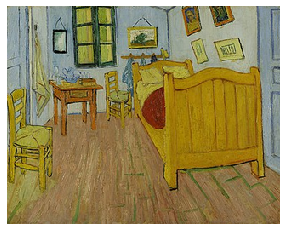

In [16]:
%matplotlib inline
import numpy as np # pour les ndarray
import matplotlib.image as mpimg # pour ouvrir et sauver les fichiers images
import matplotlib.pyplot as plt  # pour afficher les images
fileName='img/laChambre.png'     # nom du fichier
im1=mpimg.imread(fileName)       # imread : convertit le fichier image en ndarray
plt.imshow(im1)                  # affiche d'un ndarray en tant qu'image
plt.axis('off')                  # retirer les axes et leur graduations
im1.shape                       # dimensions du ndrarray = image en couleur sur 4 canaux

(256, 321)

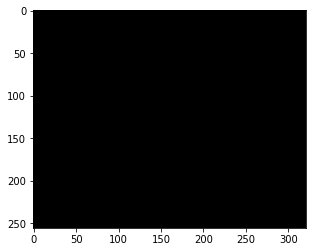

In [17]:
# Extraction d'un canal de couleur
im2=im1[:,:,3]       # sélection de la composante k=0, i.e. Rouge 
plt.imshow(im2)
plt.set_cmap('gray') # palette de couleur : gray =  nuance de gris
im2.shape            # image = tableau 2D

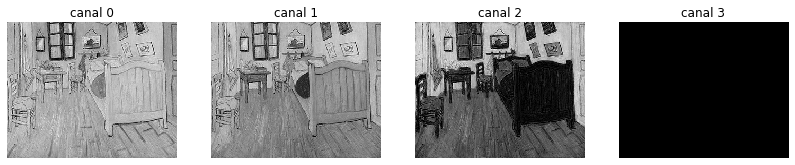

In [18]:
plt.rcParams['figure.figsize'] = [14, 5] # dimensions X,Y en inches du plot
imRed=im1[:,:,0]   # Red
imGreen=im1[:,:,1] # Green
imgBlue=im1[:,:,2] # Blue
imgAlpha=im1[:,:,3]# Opacity (alpha)
for k in range(4):
    plt.subplot(1,4,k+1)
    plt.imshow(im1[:,:,k])
    plt.axis('off')
    plt.title('canal '+str(k))

## Erosion et dilation d'une image

Seuillage (ou binarisation)

Le seuillage d'image est une technique simple de *binarisation d'image*, elle consiste à transformer une image en niveau de gris (valeurs entières entre 0 et 255 ou bien valeurs float entre 0 et 1) en une image dont les valeurs de pixels ne peuvent avoir que la valeur 0 ou 255 (ou bien 0 ou 1).

L'algorithme est le suivant : chaque pixel de l'image est comparé à une valeur choisie comme seuil.

+ Si la valeur du pixel en niveau de gris est supérieure strictement au seuil alors le pixel est mis à 255 (ou à 1).
+ Elle est mise à zéro sinon.

Dilatation

Une dilatation morphologique consiste à déplacer l'élément structurant sur chaque pixel de l'image, et à regarder si l'élément structurant « touche » (ou plus formellement intersecte) la structure d'intérêt. Le résultat est une structure qui plus grosse que la structure d'origine (Figure ci-dessous). En fonction de la taille de l'élément structurant, certaines particules peuvent se trouver connectées, et certains trous disparaître.
![dilatation](img/dilatation.png)
Erosion

L'érosion est l'opération inverse, qui est définie comme une dilatation du complémentaire de la structure. Elle consiste à chercher tous les pixels pour lesquels l'élément structurant centré sur ce pixel touche l'extérieur de la structure. Le résultat est une structure rognée (Figure ci-dessous) . On observe la disparition des particules plus petites que l'élément structurant utilisé, et la séparation éventuelle des grosses particule
![erosion](img/erosion.png)


**Exercice 4.**

Mettre en oeuvre l'algorithme de seuillage en complétant la trame de fonction donnée ci-dessous.


In [ ]:
#images en monochrome
def seuil(imageIn,v): # imageIn est une image à un seul canal et v un nombre entre 0 et 1
    # création d'un nouvel objet image qui contiendra l'image binarisée
    imageOut = np.zeros(imageIn.shape,dtype=np.float32)
    n,m = imageIn.shape
    for i in range(...): # à compléter
        for j in range(...): # à compléter
            if imageIn[...]... : # à compléter
                imageOut[...] = # à compléter
            else:
                ...             # à compléter
    return imageOut

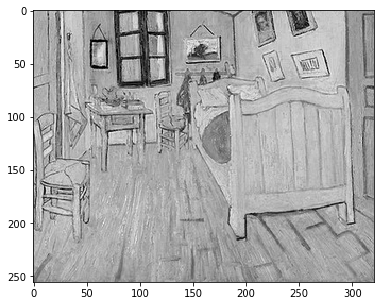

In [20]:
imA=im1[:,:,0]
plt.imshow(imA)

Vérifier la validité de votre algorithme en visualisant l'image.

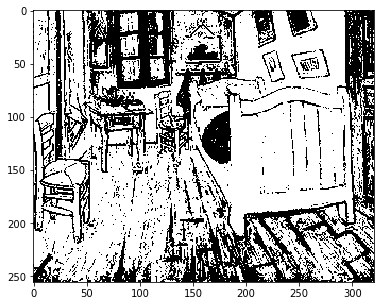

In [8]:
imB = seuil(imA, 0.53) # binarisation = seuillage
plt.imshow(imB)

**Correction**

In [38]:
#images en monochrome
def seuil(imageIn,v):
    imageOut=np.zeros(imageIn.shape,dtype=np.float32)
    n,m=imageIn.shape
    for i in range(n):
        for j in range(m):
            if imageIn[i,j]>v:
                imageOut[i,j]=1                
            else:
                imageOut[i,j]=0
    return imageOut

**Exercice 5.**

Mettre en oeuvre l'algorithme de dilatation dont le principe est le suivant :
la valeur maximale de chaque pixel de l'image est remplacée par le maximum des valeurs de ses 9 voisins (les 8 pixels voisins plus proches, ainsi que sa propre valeur).

On se limitera aux pixels **"intérieurs à l'image"**, c'est-à-dire ceux qui n'appartiennent à aucun bord de l'image (gauche, droit, haut ou bas).

Pour cela, on complétera le squelette de fonction donné ci-dessous :

In [ ]:
def dilatation(imageIn): # chaque pixel de l'image devient le max des 9 voisins
    imageOut = np.zeros(imageIn.shape)
    n,m = imageIn.shape
    for i in range(...) : # à compléter
        for j in range(...) : # à compléter
            # (i,j) au centre:
            if (i> ... ) and (i <... ) and (j>...) and (j<...): # à compléter
                val = np.max(imageIn[...]) # à compléter
                ... # à compléter
                   
    return imageOut    

**Correction**

In [45]:
def dilatation(imageIn): # chaque pixel de l'image devient le max des 9 voisins
    imageOut=np.zeros(imageIn.shape)
    n,m=imageIn.shape
    for i in range(n): # boucle sur les lignes
        for j in range(m) : # boucle sur les colonnes
            # (i,j) au centre:
            if (i>0) and (i <n-1) and (j>0) and (j<m-1):
                val=np.max(imageIn[i-1:i+2,j-1:j+2])
                imageOut[i,j]=val                
    return imageOut  

Tester l'algorithme de dilatation en visualisant l'image.

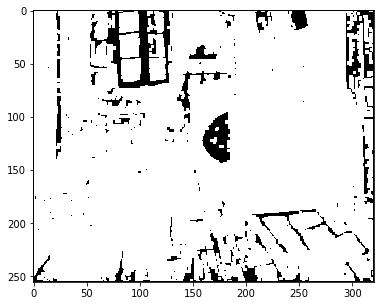

In [46]:
plt.imshow(dilatation(imB))

**Exercice 6.**

Mettre en oeuvre l'algorithme d'inversion de la couleur  dont le principe est le suivant :
la valeur de chaque pixel est inversée de telle façon :

+ qu'un pixel noir (valeur zéro) soit changé en pixel blanc (valeur 255 ou 1)
+ qu'un pixel blanc (valeur 255 ou 1) soit changé en pixel noir (valeur zéro).

Ainsi, cela revient à appliquer à la valeur $x$ de chaque pixel la fonction $f : x\mapsto 1-x$ (ou $x \mapsto 255-x$).

Pour cela, on complétera le squelette de la fonction donné ci-dessous :

In [1]:
def inversion(imageIn): # chaque pixel devient l'inverse de sa couleur
    ...
    return imageOut # imageOut est une copie de imageIn

**Correction**

In [24]:
def inversion(imageIn): # chaque pixel devient l'inverse de sa couleur
    imageOut=np.zeros(imageIn.shape,dtype=np.float32)
    n,m,k=imageIn.shape
    for i in range(n): # boucle sur les lignes
        for j in range(m) : # boucle sur les colonnes
            imageOut[i,j,:]=1-imageIn[i,j,:]
            imageOut[i,j,3]=1 # opacité
    return imageOut

In [37]:
# méthode alternative 
def inversion(imageIn): # chaque pixel devient l'inverse de sa couleur
    imageOut=np.zeros(imageIn.shape,dtype = np.float32)
    imageOut = 1.-imageIn
    imageOut[:,:,3]=1 # canal de transparence
    return imageOut

Tester votre programme.

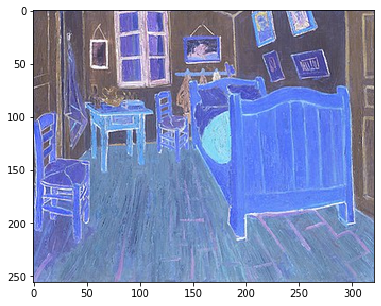

In [38]:
imA=im1[:,:]
res=inversion(imA)
plt.imshow(res)

## Images faite de points

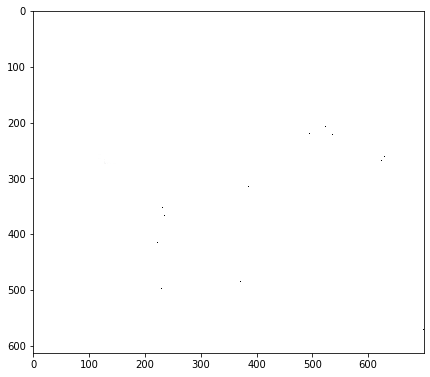

In [39]:
nf='img/oiseaux.png'
imO=mpimg.imread(nf)
imO=imO[:,:,0] # composante rouge
plt.figure(figsize=(7,7)) # taille de l'image = 7 inches / 7 inches
plt.imshow(imO)
plt.set_cmap('gray') # palette de couleur : gray =  nuance de gris

**Exercice 7**

Compléter la fonction ``getDots(im)`` ci-dessous qui renvoie la liste de coordonnées des points "noirs" de l'image ``im`` passée en argument.

In [81]:
def getDots(im):
    s = im.shape
    coords = []
    for i in range(s[0]):
        for j in range(...):# à compléter
            if im[i,j] ...  # à compléter
                ...         # à compléter
    return coords
listPoints = getDots(imO)
print(listPoints)

[[44, 121], [57, 190], [89, 72], [102, 137], [127, 288], [133, 687], [162, 454], [169, 422], [173, 323], [175, 501], [178, 81], [185, 388], [200, 348], [203, 368], [205, 162], [208, 523], [220, 495], [222, 536], [261, 134], [261, 629], [268, 623], [279, 451], [315, 385], [343, 244], [349, 202], [352, 231], [367, 235], [389, 331], [415, 222], [426, 343], [485, 371], [497, 230], [565, 300], [571, 699], [575, 264], [582, 282]]


In [ ]:
def getDots(im):
    s=im.shape
    coords=[]
    for i in range(s[0]):
        for j in range(s[1]):
            if im[i,j]==0:
                coords.append([i,j])
    return coords
listPoints=getDots(imO)
print(listPoints)

## Enregistrement au format 'csv'

**Exercice 8**
Compléter le code de la fonction ci-dessous qui enregistre la liste de coordonnées précédemment créée dans un fichier texte au format 'csv'. C'est-à-dire sous la forme suivante : 

x1 y1 

x2 y2 

x3 y3

...

Le caractère ' ' (espace) séparant chaque coordonnée. Et chaque ligne se termine par le caractère de saut de ligne ``\n``.

In [82]:
def saveTable(tab,nf):
    f = ... # ouverture en écriture
    for point in tab :
        f.write(...) # à compléter
    ... # fermeture du fichier

**Correction**

In [ ]:
def saveTable(tab,nf):
    f = open(nf,'w') # ouverture en écriture
    for point in tab:
        f.write(str(point[0])+' '+str(point[1])+'\n')
    f.close()

In [83]:
saveTable(Points,'listeVal.txt')

## Ouverture d'un fichier csv

**Exercice 9**

Compléter la fonction ci-dessous qui permet la lecture d'un fichier csv et qui renvoie le tableau ``tab`` contenant les coordonnées converties au format ``float``.

Pour cela on utilisera la méthode ``.split()`` de la classe *string*.

In [6]:
help(str.split)

Help on method_descriptor:

split(self, /, sep=None, maxsplit=-1)
    Return a list of the words in the string, using sep as the delimiter string.
    
    sep
      The delimiter according which to split the string.
      None (the default value) means split according to any whitespace,
      and discard empty strings from the result.
    maxsplit
      Maximum number of splits to do.
      -1 (the default value) means no limit.



In [12]:
%matplotlib qt
import numpy as np # pour les ndarray
import matplotlib.image as mpimg # pour ouvrir et sauver les fichiers images
import matplotlib.pyplot as plt  # pour afficher les images
import time
def litCsv(nf,sep): # nf : nom du fichier, sep : caractère séparant les colonnes
    tab = [] # liste des coordonnées lues
    f = ... # ouverture en lecture
    for Line in f: # lit toutes les lignes du fichier
        cellules = Line.split(sep) # découpe avec le caractère split
        numericLine = [] # ligne de valeurs numériques devant être concaténée
        for cell in cellules : # cellules est une liste d'objets de type string
            numericLine.append(...) # ajout d'un nombre à la ligne
        tab.append(...) # ajout de la ligne de valeurs à la liste
    ... # fermeture du fichier
    return tab        

**Correction**

In [4]:
%matplotlib qt
import numpy as np # pour les ndarray
import matplotlib.image as mpimg # pour ouvrir et sauver les fichiers images
import matplotlib.pyplot as plt  # pour afficher les images
import time
def litCsv(nf,sep):
    tab=[]
    f=open(nf,'r') # ouverture en lecture
    for Line in f: #lit toutes les lignes du fichier
        cellules=Line.split(sep) # découpe avec le caractère split
        numericLine=[] # ligne de valeurs numériques
        for cell in cellules:
            numericLine.append(float(cell)) # ajout d'un nombre à la ligne
        tab.append(numericLine) # ajout de la ligne de valeurs à la liste
    f.close()
    return tab

In [5]:
pointLus = litCsv('listeVal.txt',' ')

# Systèmes dynamiques



In [9]:
import matplotlib.pyplot as plt
import numpy as np

## Mise en équation 
Evolution d'un système dynamique : oscillateur harmonique amorti avec une excitation sinusoïdale.

Soit une masse $m$ assimilée à un point matériel M, positionnée à l'extrémité d'un ressort de raideur $k$ et de longueur à vide $\ell_0$, assujettie à se déplacer sur une droite horizontale.
![massRessort](img/massRessort2.png)
L'autre extrémité du ressort est liée rigidement à un support matériel par rapport auquel le mouvement est étudié.

La position du point M est repérée par son vecteur position
$\vec{OM} = x(t) \vec{i}$

Les frottements sont modélisés par une force d'expression 
$\vec{f}=-\eta \vec{v}$ où $\vec{v}$ est le vecteur vitesse du point M par rapport au support.

La masse M est de plus soumise à une force d'excitation $\vec{F}_{\mathrm{X}}(t) = F_X(t) \vec{i}$
où  la fonction $t \to F_X(t)$ est suit une évolution sinusoïdale : 

$$F_X(t)= F_1 \cos (\omega t)$$

où $\omega$ et $F_1$ sont des constantes.



**a. (facultative)** Faire le bilan des forces, établir l'équation du mouvement relative à la variable $x(t)$.

On pose $X(t)=x(t)-\ell_0$.

La grandeur $X(t)$ est solution de l'équation différentielle 

$$\frac{\mathrm{d}^2 X(t) }{\mathrm{d} t^2} + 2\xi \omega_0 \frac{\mathrm{d} X(t) }{\mathrm{d} t} + \omega_0^2 X(t)  = \frac{F_X (t)}{m}= G(t)$$

où $G(t)=\frac{F_X (t)}{m}= A_1 \cos(\omega t)$ avec $A_1 = 20 \,\textrm{cm}.\textrm{s}^{-2}$.

Les conditions initiales sont imposées:

$$\left\{ \begin{array}{ccc} X(t =0) &=& 0 \\ \dot{X}(t = 0) & = & V_0 \\ \end{array}\right.$$

où $V_0 = +1 \, \textrm{cm}.\textrm{s}^{-1}$.

On considère le vecteur $$\vec{Y}(t) = 
\left(\begin{array}{c} X(t) \\ \dot{X}(t) \end{array}\right)$$

**b.** écrire les équations du mouvement sous la forme d'un système dynamique
$$\frac{\mathrm{d}\vec{Y}}{\mathrm{d} t} = f\left(\vec{Y}(t),t\right)$$

**c.** Ecrire en langage Python une fonction ``G(t)`` qui renvoie la valeur de la fonction $G$ à la date $t$.
On supposera que les variables globales ``omega`` et ``A1`` ont été prélablement définies par les instructions suivantes:

In [10]:
omega = 2 * np.pi * 5 # fréquence d'excitation = 5 Hz
A1 = 20e-2 # amplitude de l'excitation = 20 cm/s²

**Correction**

In [ ]:
def G(t) :
    return A1*np.cos(omega*t)

On donne le squelette de la fonction ``oscillateur(Y,t)`` qui implémente la fonction $f$ : à partir du vecteur *Y* (``ndarrray`` de 2 lignes) et de la date $t$ renvoie le vecteur dérivée *dY* contenant les coordonnées

$$\vec{\dot{Y}}(t) = 
\left(\begin{array}{c} \dot{X}(t) \\ \ddot{X}(t) \end{array}\right)$$

Les valeurs des grandeurs $\omega_0$ et $\xi$ sont contenues dans les variables globales ``omega0`` et ``ksi`` 

In [ ]:
omega0, ksi = 2*np.pi, 0.4
def oscillateur(Y,t) :
    '''Entrées : Y, ndarray contenant les coordonnées X(t) et dX/dt à la date t
                 la date t
       Sortie  : le vecteur dérivée, dY/dt'''
    # Y est un vecteur de type ndarray
    X,dX_dt = Y # unpack des coordonnées
    dY0 = ... à compléter # première composante de dY/dt
    dY1 = ... à compléter # seconde composante de dY/dt
    return np.array([dY0,dY1]) # on retourne un ndarray

**Correction**

In [13]:
omega0, ksi = 2*np.pi, 0.4
def oscillateur(Y,t) :
    '''Entrées : Y, ndarray contenant les coordonnées X(t) et dX/dt à la date t
                 la date t
       Sortie  : le vecteur dérivée, dY/dt'''
    # Y est un vecteur de type ndarray
    X,dX_dt = Y # unpack des coordonnées
    dY0 = dX_dt   # première composante de dY/dt
    dY1 = G(t) - omega0**2 *X - 2 * ksi * omega0*dX_dt  # seconde composante de dY/dt
    return np.array([dY0,dY1]) # on retourne un ndarray

**c.** Compléter la fonction ``oscillateur(Y,t)`` donnée ci-dessus.

Intégrateur : méthode d'Euler d'ordre 1.

**d.** Rappeler brièvement le principe de la méthode d'Euler pour résoudre le système dynamique :
$$\frac{\mathrm{d}\vec{Y}}{\mathrm{d} t} = f\left(\vec{Y}(t),t\right)$$



Principe de la méthode d'Euler:

 - On discrétise le temps :  $t_n = t_0 + n \times h$ où $h$ est le pas de temps.
 
 - On calcule l'état du système à la date $t_{n+1}$ à partir de l'état du système à la date $t_n$ par:
$$\vec{Y}(t_{n+1}) \approx \vec{Y}(t_{n}) + h \times \frac{\mathrm{d}\vec{Y}}{\mathrm{d} t} (t_n)$$

On donne ci-dessous le squelette de la fonction ``integEulerExp(f, C0, h = 1e-3, t0 = 0, tf = 1.)``

In [ ]:
def integEulerExp(f, C0, h = 1e-3, t0 = 0, tf = 1.): #Euler
    # remarque : f(Y,t) renvoie le vecteur dérivé en tant que ndarray
    t, y = t0, C0 # date et état initial
    tList = [t] # initialisation de la liste des dates tn
    yList = [y] # initialisation de la liste des Yn
    while t<tf : # condition d'arret
        yNext = ... à compléter # équation d'évolution
        y = yNext # on passe au terme Yn suivant
        t = ... # on passe à l'instant suivant
        tList.append(...) # à compléter
        yList.append(...) # à compléter
    return tList,yList    

**Correction**

In [15]:
def integEulerExp(f, C0, h = 1e-3, t0 = 0, tf = 1.): #Euler
    # remarque : f(Y,t) renvoie le vecteur dérivé en tant que ndarray
    t, y = t0, C0 # date et état initial
    tList = [t] # initialisation de la liste des dates tn
    yList = [y] # initialisation de la liste des Yn
    while t<tf : # condition d'arret
        yNext = y + h * f(y,t) # équation d'évolution
        y = yNext # on passe au terme Yn suivant
        t = t + h # on passe à l'instant suivant
        tList.append(t) # ajoute la date tn dans  tList
        yList.append(y) # ajoute le vecteur Yn dans ylist
    return tList,yList    

**e.** Compléter cette fonction 

**f.** Compléter le script ci-dessous afin :

- d'appliquer la condition initiale $\vec{C}_0$,
- de lancer l'appel à l'intégrateur d'Euler où la fonction $f$ est la fonction ``oscillateur`` précédemment définie avec un pas de temps $h = 10^{-3} \, \textrm{s}$
- d'extraire et d'afficher l'évolution du signal $X(t)$ en fonction du temps dans l'intervalle $0 \le t  < t_\mathrm{final}$ avec $t_\mathrm{final} = 10\, \textrm{s}$

In [ ]:
# script à compléter
omega0, ksi = 2*np.pi, 0.1
C0 = np.array( ... à compléter ) # conditions initiales X0 = 0 m, V0 = 1 cm/s
tn, Yn = integEulerExp(...) # à compléter
tn = np.array(tn) # conversion en ndarray
Yn = np.array(Yn) # conversion en ndarray
... à compléter # affichage de la position X(t) en fonction du temps t
plt.grid(True) # grille pour faciliter la lecture graphie

**Correction**

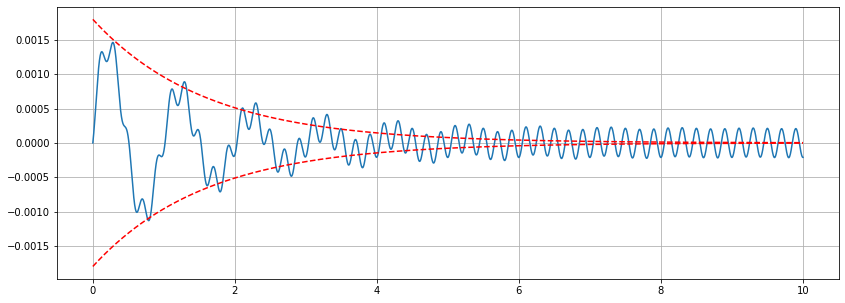

In [17]:
# script à compléter
omega0, ksi = 2*np.pi, 0.1
C0 = np.array( [0 ,0.01]) # (X0 = 0, V0 = 1 cm/s
tn, Yn = integEulerExp(oscillateur,C0,h = 1e-3,tf = 10)
tn = np.array(tn) # conversion en ndarray
Yn = np.array(Yn) # conversion en ndarray
plt.plot(tn,Yn[:,0]) # position
tau = 1.59 # constante de temps (s)
plt.plot(tn,0.0018*np.exp(-tn/tau),'--r') # décroissance exponentielle de l'enveloppe
plt.plot(tn,-0.0018*np.exp(-tn/tau),'--r')
plt.grid(True)

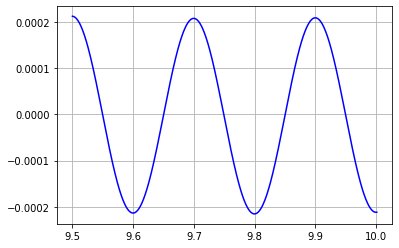

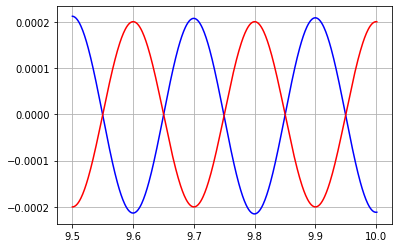

**g.** Mesurer l'amplitude $X_\mathrm{m}$ de $X(t)$ en régime permanent. 

Pour cela, on demande de visualiser le graphe du signal $X(t)$ sur l'intervalle $9,5\,\textrm{s} \le t < 10 \,\textrm{s}$

Comparer à la valeur que l'on obtiendra en utilisant la notation complexe adaptée au régime sinusoïdal forcé.

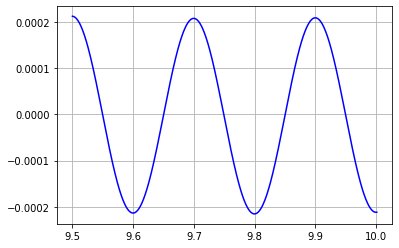

In [158]:
# Représentation du régime permanent
tSub = tn[9500:]
xSub = Yn[9500:,0]
gSub = G(tSub)
plt.plot(tSub,xSub,'b')
#plt.plot(tSub,gSub/1e3,'r')
plt.grid(True)

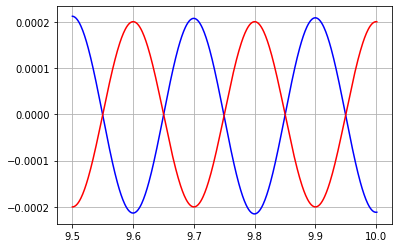

In [159]:
# Représentation du régime permanent et de l'excitation
tSub = tn[9500:]
xSub = Yn[9500:,0]
gSub = G(tSub)
plt.plot(tSub,xSub,'b')
plt.plot(tSub,gSub/1e3,'r') # excitation divisée par 1000
plt.grid(True)

En notation complexe :

- à $X(t)$ on associe $\underline{X}$ et 

- à $G(t)$ on associe $\underline{G} = A_1 e^{j\times 0} = A_1$

tel que l'équation, initialement dans le domaine temporel :

$$\frac{\mathrm{d}^2 X(t) }{\mathrm{d} t^2} + 2\xi \omega_0 \frac{\mathrm{d} X(t) }{\mathrm{d} t} + \omega_0^2 X(t)  = \frac{F_X (t)}{m}= G(t)$$

devient, dans le domaine fréquentiel :

$$ (j\omega)^2 \underline{X} + 2 \xi \omega_0 (j\omega) \underline{X} + \omega_0^2 \underline{X} = A_1$$

On en déduit donc:

$$\underline{X} = \frac{A_1}{(-\omega^2+\omega_0^2)+ j (2\xi\omega \omega_0)} $$

Ainsi, le module de $\underline{X}$ qui représente l'amplitude de $X(t)$ est :


$$ X_\mathrm{m}=\lvert\underline{X}\rvert=\frac{A_1}{\sqrt{(\omega_0^2-\omega^2) ^2 +(2 \xi \omega\omega_0) ^2 } }$$

In [137]:
# application numérique
Xm = A1/np.sqrt((omega0**2-omega**2)**2 + (2*ksi*omega*omega0)**2)
print(Xm)

0.00021090280329567396


**h.** Calculer la constante de temps associée au régime libre. Et vérifier la valeur numérique par lecture graphique.

In [138]:
# constant de temps de décroissance
tau = 1/(ksi*omega0)
print(tau)

1.5915494309189535


Cette valeur est en accord avec l'évolution exponentiellement décroissante de l'enveloppe.

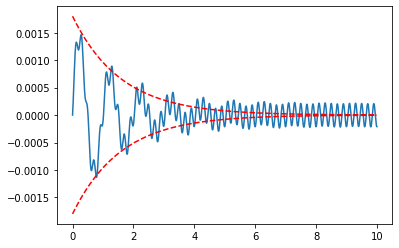

In [161]:
plt.plot(tn,Yn[:,0]) # graphe de l'évolution X(t)
plt.plot(tn,0.0018*np.exp(-tn/tau),'--r') # décroissance exponentielle de l'enveloppe
plt.plot(tn,-0.0018*np.exp(-tn/tau),'--r')